<a href="https://colab.research.google.com/github/statmike/Logistic-Regression/blob/main/02_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Important Tools for Fitting: Descriptions and Demonstrations

The example above is rather simple: 2 classification levels, single continous factor.  No missing data, no rare events, no execess of features, no ability to add more features ....

In real-life we need tools to handle complexity ... messiness

Feature Engineering is all about making the data useful for machine learning!

The following takes common tasks and shows some typical ways of handling them.  This is not a detailed or exhaustive list but is a great starting point for understanding.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import linear_model

### Categorical Factors - call me a dummy!

One-hot encoding ...

Why one-hot?


In [2]:
size_format = {0 : 'Small', 1 : 'Medium', 2 : 'Large'}

In [3]:
np.random.seed(seed=32259)
coffee = pd.DataFrame({'size' : np.random.binomial(1,.5,10)})
coffee['size_code'] = coffee['size'].map(size_format)
coffee

,size,size_code
0,1,Medium
1,0,Small
2,0,Small
3,1,Medium
4,0,Small
5,0,Small
6,1,Medium
7,1,Medium
8,1,Medium
9,0,Small


In [4]:
pd.get_dummies(coffee['size_code'])

,Medium,Small
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0
7,1,0
8,1,0
9,0,1


In [5]:
np.random.seed(seed=32259)
coffee = pd.DataFrame({'size' : np.random.binomial(2,.5,10)})
coffee['size_code'] = coffee['size'].map(size_format)
coffee

,size,size_code
0,2,Large
1,1,Medium
2,1,Medium
3,2,Large
4,0,Small
5,1,Medium
6,1,Medium
7,2,Large
8,1,Medium
9,1,Medium


In [6]:
pd.get_dummies(coffee['size_code'])

,Large,Medium,Small
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,0,1,0
9,0,1,0


### Continous Factors - stairs can make the hill easier to climb

In [7]:
np.random.seed(seed=32259)
dist = pd.DataFrame(np.random.normal(loc=(10,20), scale=(4,2), size=(1000,2)),columns=['x1','x2'])
dist.describe()

,x1,x2
count,1000.000000,1000.000000
mean,10.014745,20.001762
std,3.810962,1.968010
min,-0.812063,12.509771
25%,7.385437,18.680680
50%,9.783921,20.020651
75%,12.492201,21.351225
max,24.112145,26.366796


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


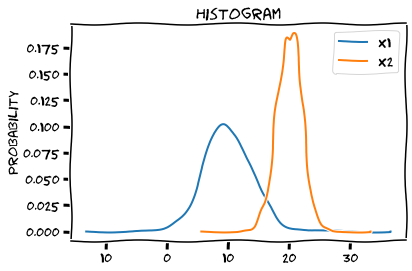

In [8]:
plt.xkcd()
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=True, title='Histogram')
ax.set_ylabel('Probability')
ax.grid(axis='y')
plt.rcdefaults()

#### Scale

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


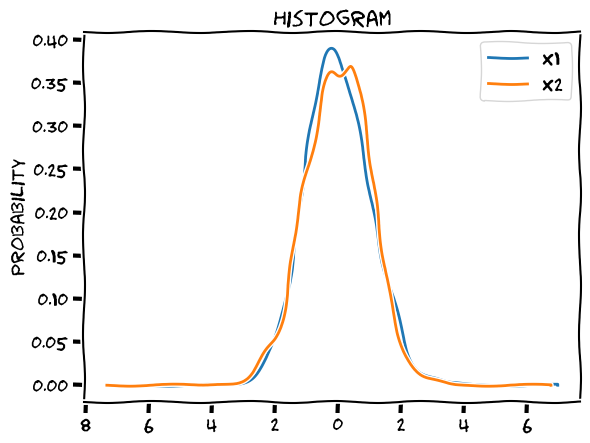

In [9]:
# mean normalization
normalized_dist = (dist-dist.mean())/dist.std()

plt.xkcd()
fig, ax = plt.subplots()
normalized_dist.plot.kde(ax=ax, legend=True, title='Histogram')
ax.set_ylabel('Probability')
ax.grid(axis='y')
plt.rcdefaults()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


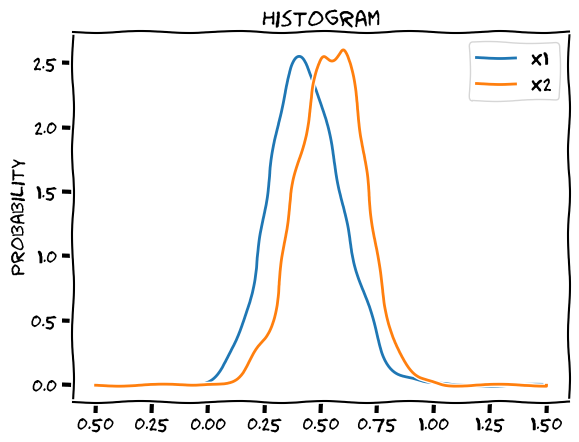

In [10]:
# min/max normalization
normalized_dist = (dist-dist.min())/(dist.max()-dist.min())

plt.xkcd()
fig, ax = plt.subplots()
normalized_dist.plot.kde(ax=ax, legend=True, title='Histogram')
ax.set_ylabel('Probability')
ax.grid(axis='y')
plt.rcdefaults()

#### Divy-Up

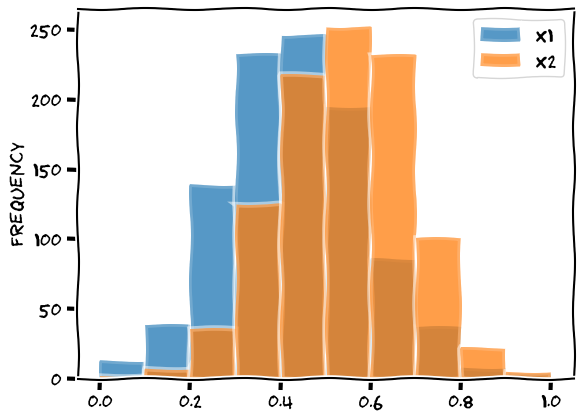

In [11]:
plt.xkcd()
fig, ax = plt.subplots()
normalized_dist.plot.hist(ax=ax, bins=10, alpha=0.5, legend=True)
plt.rcdefaults()

### Missing Points? (must be somewhere in [The Middle](https://youtu.be/M3mJkSqZbX4?t=36))

In [12]:
np.random.seed(seed=32259)
coffee['taste'] = pd.DataFrame({'taste' : np.random.normal(10,1,10) * np.random.binomial(1,.8,10)})
coffee.loc[coffee['taste'] == 0, 'taste'] = np.nan
coffee

,size,size_code,taste
0,2,Large,NaN
1,1,Medium,NaN
2,1,Medium,10.708636
3,2,Large,9.740679
4,0,Small,NaN
5,1,Medium,8.634119
6,1,Medium,11.520915
7,2,Large,NaN
8,1,Medium,NaN
9,1,Medium,10.190728


In [13]:
coffee['taste_mean']= coffee['taste'].fillna(coffee['taste'].mean())
coffee.style.highlight_null(null_color='red')

,size,size_code,taste,taste_mean
0,2,Large,nan,10.159015
1,1,Medium,nan,10.159015
2,1,Medium,10.708636,10.708636
3,2,Large,9.740679,9.740679
4,0,Small,nan,10.159015
5,1,Medium,8.634119,8.634119
6,1,Medium,11.520915,11.520915
7,2,Large,nan,10.159015
8,1,Medium,nan,10.159015
9,1,Medium,10.190728,10.190728


In [14]:
coffee['taste_med']= coffee['taste'].fillna(coffee['taste'].median())
coffee.style.highlight_null(null_color='red')

,size,size_code,taste,taste_mean,taste_med
0,2,Large,nan,10.159015,10.190728
1,1,Medium,nan,10.159015,10.190728
2,1,Medium,10.708636,10.708636,10.708636
3,2,Large,9.740679,9.740679,9.740679
4,0,Small,nan,10.159015,10.190728
5,1,Medium,8.634119,8.634119,8.634119
6,1,Medium,11.520915,11.520915,11.520915
7,2,Large,nan,10.159015,10.190728
8,1,Medium,nan,10.159015,10.190728
9,1,Medium,10.190728,10.190728,10.190728


In [15]:
coffee['size_code2'] = coffee['size_code']
coffee['size_code2'][5] = np.nan
coffee.style.highlight_null(null_color='red')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,size,size_code,taste,taste_mean,taste_med,size_code2
0,2,Large,nan,10.159015,10.190728,Large
1,1,Medium,nan,10.159015,10.190728,Medium
2,1,Medium,10.708636,10.708636,10.708636,Medium
3,2,Large,9.740679,9.740679,9.740679,Large
4,0,Small,nan,10.159015,10.190728,Small
5,1,Medium,8.634119,8.634119,8.634119,nan
6,1,Medium,11.520915,11.520915,11.520915,Medium
7,2,Large,nan,10.159015,10.190728,Large
8,1,Medium,nan,10.159015,10.190728,Medium
9,1,Medium,10.190728,10.190728,10.190728,Medium


In [16]:
coffee['size_code2_mode']= coffee['size_code2'].fillna(coffee['size_code2'].mode()[0])
coffee.style.highlight_null(null_color='red')

,size,size_code,taste,taste_mean,taste_med,size_code2,size_code2_mode
0,2,Large,nan,10.159015,10.190728,Large,Large
1,1,Medium,nan,10.159015,10.190728,Medium,Medium
2,1,Medium,10.708636,10.708636,10.708636,Medium,Medium
3,2,Large,9.740679,9.740679,9.740679,Large,Large
4,0,Small,nan,10.159015,10.190728,Small,Small
5,1,Medium,8.634119,8.634119,8.634119,nan,Medium
6,1,Medium,11.520915,11.520915,11.520915,Medium,Medium
7,2,Large,nan,10.159015,10.190728,Large,Large
8,1,Medium,nan,10.159015,10.190728,Medium,Medium
9,1,Medium,10.190728,10.190728,10.190728,Medium,Medium


### Get Fit

[![title here](https://www.betterthanpants.com/media/catalog/product/i/m/im-into-fitness-fitness-taco-in-my-mouth-funny-shirt-large.png)](https://www.betterthanpants.com/i-m-into-fitness-fit-ness-taco-in-my-mouth-funny-shirt#)


HA!  A better example (click it for article):

[![title here](https://miro.medium.com/max/1400/1*_7OPgojau8hkiPUiHoGK_w.png)](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76)

#### Regulate Bad Behavior to get a "Good Fit"
It's like putting some of your weight in the penalty box:

![title here](https://images.pexels.com/photos/793111/pexels-photo-793111.jpeg?cs=srgb&dl=pexels-francesco-paggiaro-793111.jpg&fm=jpg)
Photo by Francesco Paggiaro from Pexels


Types of penalties....

Regulate = build a less complex model

**Common**

Why L1 and L2?
- names come from [vector norm calculations](https://simple.wikipedia.org/wiki/Norm_(mathematics))
- both introduce a hyperparameter that is the multiplier of a penalty
- L1 is Lasso
  - Lasso Regression
  - Lasso = LASSO = Least Aboslute Shrinkage and Selection Operator
  - penalty is on absolute value of magnitude of the coefficient (how far it is from zero)
    - zero is like no regularization
    - large is like over-weighting, ... so underfitting
  - It reins in less important features! Even removes them altogether sometimes. 
  - Feature selection!
- L2 is Ridge
  - Ridge Regression
  - here
  - penalty is on the squared magnitude of the coefficient
    - zero is like no regularization
    - large is like over-weighting, ... so underfitting 
- elastic net?
  - Combination of L1 and L2
  - and it adds another hyperparmeter that adjusts the mixture of L1 and L2
  


Is there something else?
Of Course! It's math so there is always more!
For instance, Neural networks have
- L1 and L2!!!
- and
  - dropout
  - batch-normalization
  - data augmentation
  - early stopping


In [17]:
from sklearn import datasets
digits = datasets.load_digits()
digits_df = pd.DataFrame(data=digits.data)
digits_df['target'] = digits.target
digits_df['target_OE'] = digits_df['target'].apply(lambda x : 'Odd' if x%2==1 else ('Even' if x%2==0 else ''))

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(digits_df.iloc[:,:64], digits_df.target_OE, test_size=0.25, random_state=32259)

lr_none = sk.linear_model.LogisticRegression(max_iter=3000, solver='saga', penalty='none') # bump up  from default of max_iter=100
lr_none.fit(x_train, y_train)

lr_l1 = sk.linear_model.LogisticRegression(max_iter=3000, solver='saga', penalty='l1') # bump up  from default of max_iter=100
lr_l1.fit(x_train, y_train)

lr_l2 = sk.linear_model.LogisticRegression(max_iter=3000, solver='saga', penalty='l2') # bump up  from default of max_iter=100
lr_l2.fit(x_train, y_train)

lr_en = sk.linear_model.LogisticRegression(max_iter=3000, solver='saga', penalty='elasticnet', l1_ratio=.5) # bump up  from default of max_iter=100
lr_en.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
coef = pd.DataFrame(data=lr_none.coef_.T,columns=['No Regularization'])
coef['L1 Regularization'] = pd.DataFrame(lr_l1.coef_.T)
coef['L2 Regularization'] = pd.DataFrame(lr_l2.coef_.T)
coef['Elastic Net Regularization'] = pd.DataFrame(lr_en.coef_.T)
coef

,No Regularization,L1 Regularization,L2 Regularization,Elastic Net Regularization
0,0.000000,0.000000,0.000000,0.000000
1,0.073589,0.003852,0.072027,0.039288
2,-0.128753,-0.099927,-0.126909,-0.113198
3,0.225855,0.216577,0.222765,0.219791
4,-0.050512,-0.047461,-0.051272,-0.049384
...,...,...,...,...
59,-0.022060,-0.017676,-0.021330,-0.019846
60,-0.149221,-0.145784,-0.148963,-0.147147
61,0.192187,0.175499,0.187217,0.180861
62,-0.238008,-0.224750,-0.239600,-0.231708


In [19]:
coef[coef['L1 Regularization']==0]

,No Regularization,L1 Regularization,L2 Regularization,Elastic Net Regularization
0,0.000000,0.0,0.000000,0.000000
7,0.058252,0.0,0.030249,0.000000
8,-0.394225,0.0,-0.227361,-0.053649
16,0.444519,0.0,0.249970,0.077627
24,-0.057160,0.0,-0.016117,0.000000
31,0.000000,0.0,0.000000,0.000000
32,0.000000,0.0,0.000000,0.000000
39,0.000000,0.0,0.000000,0.000000
40,-0.001112,0.0,-0.000684,0.000000
48,-0.000023,0.0,-0.000004,0.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


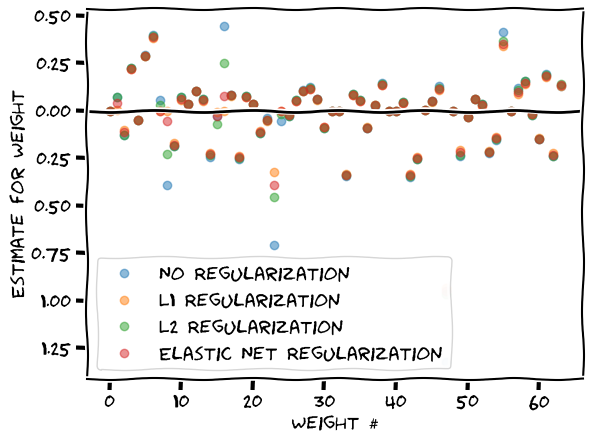

In [20]:
plt.xkcd()
plt.axhline(0,color='black')
plt.scatter(coef.index, coef['No Regularization'], alpha=0.5, label='No Regularization')
plt.scatter(coef.index, coef['L1 Regularization'], alpha=0.5, label='L1 Regularization')
plt.scatter(coef.index, coef['L2 Regularization'], alpha=0.5, label='L2 Regularization')
plt.scatter(coef.index, coef['Elastic Net Regularization'], alpha=0.5, label='Elastic Net Regularization')
plt.xlabel("Weight #")
plt.legend()
plt.ylabel("Estimate for Weight")
plt.rcdefaults()

In [21]:
print("No Regularization: \n",sk.metrics.classification_report(y_test,lr_none.predict(x_test)))

No Regularization: 
               precision    recall  f1-score   support

        Even       0.91      0.90      0.91       220
         Odd       0.91      0.91      0.91       230

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [22]:
print("L1 Regularization: \n",sk.metrics.classification_report(y_test,lr_l1.predict(x_test)))

L1 Regularization: 
               precision    recall  f1-score   support

        Even       0.91      0.90      0.91       220
         Odd       0.91      0.92      0.91       230

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [23]:
print("L2 Regularization: \n",sk.metrics.classification_report(y_test,lr_l2.predict(x_test)))

L2 Regularization: 
               precision    recall  f1-score   support

        Even       0.91      0.90      0.91       220
         Odd       0.91      0.91      0.91       230

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [24]:
print("Elastic Net Regularization:",sk.metrics.classification_report(y_test,lr_en.predict(x_test)))

Elastic Net Regularization:               precision    recall  f1-score   support

        Even       0.91      0.90      0.91       220
         Odd       0.91      0.92      0.91       230

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



4 Fits, Three types of regularization, 4 seperate sets of parameter estimates, all have the same accuracy.  